In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and direc

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

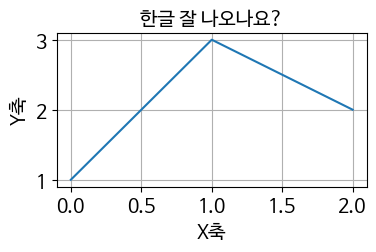

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 2))
plt.title("한글 잘 나오나요?", fontsize=14)
plt.plot([1, 3, 2])
plt.xlabel("X축")
plt.ylabel("Y축")
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!touch __init__.py

In [ ]:
import sys
import os
import importlib

# 현재 작업 디렉토리 (파일이 업로드된 위치)를 sys.path에 추가
# 일반적으로 '.' 이 현재 디렉토리를 나타냅니다.
colab_module_path = os.getcwd() # 또는 '.'

if colab_module_path not in sys.path:
    sys.path.append(colab_module_path)
    print(f"✅ '{colab_module_path}' 경로가 시스템 경로에 추가되었습니다.")
else:
    print(f"ℹ️ '{colab_module_path}' 경로는 이미 시스템 경로에 존재합니다.")

# sys.path 확인
print("\n--- 임포트 직전 sys.path (Colab 환경) ---")
for p in sys.path:
    print(p)
print("-----------------------------------------\n")

# 캐시 문제 방지를 위해 'modules' 관련 캐시 제거 시도 (필요시)
try:
    # 이전에 Drive 경로에서 로드하려다 실패한 캐시가 남아있을 수 있습니다.
    if 'modules' in sys.modules:
        print("🔄 'modules' 패키지 캐시 무효화 시도...")
        del sys.modules['modules']
        print("✅ 'modules' 패키지 캐시 무효화 완료")
    # data_loader나 feature_selector 등 하위 모듈 캐시도 제거 (필요시)
    if 'modules.data_loader' in sys.modules:
         del sys.modules['modules.data_loader']
         print("✅ 'modules.data_loader' 캐시 무효화 완료")
    if 'modules.feature_selector' in sys.modules:
         del sys.modules['modules.feature_selector']
         print("✅ 'modules.feature_selector' 캐시 무효화 완료")

except KeyError:
    print("ℹ️ 'modules' 관련 캐시가 sys.modules에 없습니다. 캐시 무효화 불필요.")
except Exception as e:
    print(f"❌ 캐시 무효화 중 오류 발생: {type(e).__name__}: {e}")


# 이제 모듈을 임포트합니다.
print("\n--- 모듈 임포트 시도 ---")
try:
    # 패키지 임포트 시도
    import modules
    print("✅ 'modules' 패키지 임포트 성공")

    # 하위 모듈 및 함수 임포트 시도
    from modules.data_loader import load_and_process
    from modules.feature_selector import stage_feature_map
    print("✅ modules 하위 함수들 임포트 성공")

    # 이제 load_and_process 함수 등을 사용할 수 있습니다.
    # 예: train_e, e_cols = load_and_process(file_path, stage_name)


except ModuleNotFoundError as e:
    print(f"❌ ModuleNotFoundError 발생: {e}")
    print("💡 파일이 올바르게 업로드되었는지, __init__.py 파일이 있는지, 그리고 해당 디렉토리가 sys.path에 제대로 추가되었는지 다시 확인해 주세요.")
    print("💡 또한, data_loader.py 또는 feature_selector.py 파일 자체 내부에 다른 임포트 오류가 없는지 확인해 보세요.")

except Exception as e:
    print(f"❌ 임포트 중 다른 오류 발생: {type(e).__name__}: {e}")
    import traceback
    traceback.print_exc() # 상세 트레이스백 출력
    print("💡 이 오류는 모듈 파일 내부 코드 문제일 가능성이 높습니다. data_loader.py, feature_selector.py 파일의 내용을 확인해 주세요.")

print("-----------------------\n")

ℹ️ '/content' 경로는 이미 시스템 경로에 존재합니다.

--- 임포트 직전 sys.path (Colab 환경) ---
/content
/env/python
/usr/lib/python311.zip
/usr/lib/python3.11
/usr/lib/python3.11/lib-dynload

/usr/local/lib/python3.11/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.11/dist-packages/IPython/extensions
/usr/local/lib/python3.11/dist-packages/setuptools/_vendor
/root/.ipython
-----------------------------------------


--- 모듈 임포트 시도 ---
❌ ModuleNotFoundError 발생: No module named 'modules'
💡 파일이 올바르게 업로드되었는지, __init__.py 파일이 있는지, 그리고 해당 디렉토리가 sys.path에 제대로 추가되었는지 다시 확인해 주세요.
💡 또한, data_loader.py 또는 feature_selector.py 파일 자체 내부에 다른 임포트 오류가 없는지 확인해 보세요.
-----------------------



In [ ]:
# modules 경로는 이 셀에서 임포트하는 것이 아니라,
# 이전 셀에서 sys.path에 추가하고 임포트하는 것으로 처리했습니다.
# 여기서 다시 임포트할 필요는 없습니다.
# from modules.data_loader import load_and_process
# from modules.feature_selector import stage_feature_map

# Google Drive에 연동된 경로로 변경
file_path = "/content/drive/MyDrive/data/통합_train_데이터.parquet"
test_path = "/content/drive/MyDrive/data/통합_test_데이터.parquet"

stage_name = "e" # <- 변경해서 사용
save_path = "./models"

print(f"✅ 학습 데이터 경로 설정 완료: {file_path}")
print(f"✅ 테스트 데이터 경로 설정 완료: {test_path}")
print(f"✅ 현재 처리 단계 설정 완료: {stage_name}")
print(f"✅ 모델 저장 경로 설정 완료: {save_path}")

✅ 학습 데이터 경로 설정 완료: /content/drive/MyDrive/data/통합_train_데이터.parquet
✅ 테스트 데이터 경로 설정 완료: /content/drive/MyDrive/data/통합_test_데이터.parquet
✅ 현재 처리 단계 설정 완료: e
✅ 모델 저장 경로 설정 완료: ./models


In [ ]:
from modules.feature_selector import (
    a_to_e_base_features,
    get_required_base_columns_for_derived_features,
    generate_common_derived_features
)
from modules.preprocess_utils import map_categorical_columns
from modules.feature_selector import generate_rfm_features_original, rfm_base_columns, rfm_feature_cols, abcd_final_features, a_to_e_base_features
import pandas as pd

# ✅ 전체 불러올 컬럼 조합
base_cols = ["ID", "Segment"]
required_cols = get_required_base_columns_for_derived_features()
train_cols = sorted(set(base_cols + a_to_e_base_features + required_cols + rfm_base_columns))
train_df = pd.read_parquet(file_path, columns=train_cols)             # 데이터 로드

# ✅ 데이터 불러오기 + 전처리 파이프라인
train_df = map_categorical_columns(train_df)                          # 범주형 인코딩
train_df = generate_rfm_features_original(train_df)                   # RFM 변수 및 세그먼트 생성
train_df = generate_common_derived_features(train_df)                 # 파생변수 생성

final_features = base_cols + list(set(a_to_e_base_features + abcd_final_features + rfm_feature_cols)) # 최종선별 피처

[연회비발생카드수_B0M] 인코딩 완료
[한도증액횟수_R12M] 인코딩 완료
[이용금액대] 중간값 인코딩 완료
[할인건수_R3M] 인코딩 완료
[할인건수_B0M] 인코딩 완료
✔️ RFM 파생변수 생성 완료
=== RFM 변수 요약 ===

-- Recency 통계 --
count    2.400000e+06
mean     7.360273e+01
std      7.241042e+01
min      2.000000e+00
25%      1.700000e+01
50%      5.100000e+01
75%      1.040000e+02
max      3.370000e+02
Name: Recency, dtype: float64
값 분포:
Recency
2       52023
3       55969
4       59968
5       64069
6      119886
        ...  
333         1
334         1
335         1
336         1
337         2
Name: count, Length: 335, dtype: int64

-- Frequency 통계 --
count    2.400000e+06
mean     1.086286e+02
std      1.343633e+02
min      0.000000e+00
25%      5.000000e+00
50%      5.100000e+01
75%      1.660000e+02
max      8.620000e+02
Name: Frequency, dtype: float64
값 분포:
Frequency
0      451477
1       38305
2       34133
3       30755
4       27743
        ...  
853         1
854         1
856         2
861         1
862         2
Name: count, Length: 850, dtype: int6

In [ ]:
df = train_df[final_features]

In [ ]:
# ✅ 전체 컬럼 수 및 미리보기
print(f"총 컬럼 수: {len(df.columns)}개")
print("\n📌 전체 컬럼 목록:")
print(df.columns.tolist())

# ✅ 결측치 요약
print("\n🔍 결측치 개수:")
print(df.isnull().sum().sort_values(ascending=False))

# ✅ 데이터 타입 요약
print("\n📊 데이터 타입 요약:")
print(df.dtypes.value_counts())

총 컬럼 수: 195개

📌 전체 컬럼 목록:
['ID', 'Segment', '변동률_RV일시불평잔', '쇼핑_마트_이용금액', '상향가능CA한도금액', '연속유실적개월수_기본_24M_카드', '정상청구원금_B0M', '연회비발생카드수_B0M', '인입일수_ARS_B0M', '포인트_마일리지_월적립_B0M', '평잔_CA_3M', '카드이용한도금액', '증감율_이용금액_신용_전월', '매각잔액_B1M', '이용여부_3M_해외겸용_본인', '이용금액_일시불_B0M', '이용금액대', 'CA이자율_할인전', '이용후경과월_일시불', '청구금액_B0', 'RP건수_보험_B0M', '컨택건수_신용발급_TM_R6M', '신판CA_평균소진율_비중', '최종카드론_대출이율', '인입횟수_IB_R6M', '이용건수_신용_R12M', '정상입금원금_B2M', '일시상환론한도금액', 'RV현금서비스이자율_할인전', 'Recency', '잔액_신판최대한도소진율_r6m', '신용체크_이용비율_R3M', '이용건수_일시불_R12M', '이용금액_해외', '승인거절건수_R3M', '연체잔액_B0M', '연체감액여부_R3M', '청구서발송여부_R3M', '교통_주유이용금액', '포인트_마일리지_환산_B0M', '할인비율_R3M', '평잔_카드론_3M', '혜택수혜금액_R3M', '변동률_할부평잔', '카드론이용건수_누적', '선입금원금_B2M', '증감율_이용금액_체크_분기', '방문일수_앱_R6M', '연체잔액_RV일시불_B0M', '월상환론한도금액', '정상입금원금_B0M', '이용건수_할부_무이자_R12M', '정상청구원금_증감률_B5M_B2M', '할인건수_B0M', '월상환론상향가능한도금액', '이용금액_R3M_신용체크', '이용금액_선결제_R6M', '할인금액_R3M', '포인트_포인트_건별_B0M', '무이자_장단기비율', '인입월수_IB_R6M', '남녀구분코드', '컨택건수_이용유도_TM_R6M', '할부건수_3M_R12M', '청구금액_R3M', '탈회횟수_누적', 

In [ ]:
# prompt: optuna 설치

!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.1 MB/s eta 0:00:00


In [ ]:
# 📌 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

# 📌 1. 데이터 전처리
X = df.drop(columns=["ID", "Segment"]).copy()
y = df["Segment"]

# 범주형 인코딩
cat_cols = X.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 스케일링
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 타겟 인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 📌 2. Optuna로 하이퍼파라미터 튜닝 (3-Fold 교차검증 기준)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 180, 650),
        'max_depth': trial.suggest_int('max_depth', 7, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'device' : 'cuda',
        'predictor': 'gpu_predictor',
        'eval_metric': 'mlogloss',
        'random_state': 42
    }

    model = XGBClassifier(**params)

    # 간단한 평가 (K-Fold 없이 전체에서 cross_val)
    score = cross_val_score(model, X_scaled, y_encoded, cv=3, scoring='f1_weighted')
    return score.mean()

#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=50)  # ✅ 컴퓨터 리소스 고려해서 50회만

# 최적 파라미터 확인
#best_params = study.best_params

best_params = {
    'n_estimators': 591,
    'max_depth': 10,
    'learning_rate': 0.08979609668437435,
    'subsample': 0.7064132236006867,
    'colsample_bytree': 0.7095439521110893
}
print("\n✅ 최적 하이퍼파라미터:")
for k, v in best_params.items():
    print(f"{k}: {v}")


✅ 최적 하이퍼파라미터:
n_estimators: 591
max_depth: 10
learning_rate: 0.08979609668437435
subsample: 0.7064132236006867
colsample_bytree: 0.7095439521110893


In [ ]:
xgb_model = XGBClassifier(
        **best_params,
        tree_method='gpu_hist',
        predictor='gpu_predictor',
        eval_metric='mlogloss',
        random_state=42
    )

xgb_model.fit(X_scaled, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7095439521110893, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08979609668437435,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=591, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb_model.predict(X)

In [ ]:
# 📌 3. K-Fold 학습 (튜닝된 파라미터로)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
ros = RandomOverSampler(sampling_strategy={0: 2000, 1: 2000}, random_state=42)

fold = 1
all_reports = []

for train_idx, val_idx in skf.split(X_scaled, y_encoded):
    X_train, X_val = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    X_train_os, y_train_os = ros.fit_resample(X_train, y_train)
    print(f"\n🔁 Fold {fold} 오버샘플링 완료:", pd.Series(y_train_os).value_counts().to_dict())

    # 튜닝된 파라미터 + 고정 파라미터 구성
    xgb_model = XGBClassifier(
        **best_params,
        tree_method='gpu_hist',
        predictor='gpu_predictor',
        eval_metric='mlogloss',
        random_state=42
    )

    xgb_model.fit(X_train_os, y_train_os)
    y_pred = xgb_model.predict(X_val)

    print(f"\n📘 Fold {fold} 결과")
    print(classification_report(y_val, y_pred, target_names=le_y.classes_))

    all_reports.append(classification_report(y_val, y_pred, output_dict=True))
    fold += 1


🔁 Fold 1 오버샘플링 완료: {4: 1281368, 3: 232828, 2: 85060, 0: 2000, 1: 2000}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:56:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:56:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



📘 Fold 1 결과
              precision    recall  f1-score   support

           A       0.93      0.63      0.75       324
           B       1.00      0.71      0.83        48
           C       0.88      0.77      0.82     42530
           D       0.84      0.80      0.82    116414
           E       0.97      0.98      0.97    640684

    accuracy                           0.94    800000
   macro avg       0.92      0.78      0.84    800000
weighted avg       0.94      0.94      0.94    800000


🔁 Fold 2 오버샘플링 완료: {4: 1281368, 3: 232828, 2: 85060, 0: 2000, 1: 2000}


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# 준비된 데이터: X_scaled (DataFrame), y_encoded (np.array), le_y (LabelEncoder)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
ros = RandomOverSampler(sampling_strategy={0: 2000, 1: 2000}, random_state=42)

fold = 1
all_reports = []
df_oof_list = []

for train_idx, val_idx in skf.split(X_scaled, y_encoded):
    X_train, X_val = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    X_train_os, y_train_os = ros.fit_resample(X_train, y_train)
    print(f"\n🔁 Fold {fold} 오버샘플링 완료:", pd.Series(y_train_os).value_counts().to_dict())

    xgb_model = XGBClassifier(
        **best_params,
        device='cuda',
        predictor='gpu_predictor',
        eval_metric='mlogloss',
        random_state=42
    )

    xgb_model.fit(X_train_os, y_train_os)

    # 예측 및 확률
    y_pred = xgb_model.predict(X_val)
    y_proba = xgb_model.predict_proba(X_val)

    print(f"\n📘 Fold {fold} 결과")
    print(classification_report(y_val, y_pred, target_names=le_y.classes_))
    all_reports.append(classification_report(y_val, y_pred, output_dict=True))

    # ✅ OOF 저장을 위한 구성
    df_val = X_scaled.iloc[val_idx].copy()
    df_val["Segment_true"] = le_y.inverse_transform(y_val)
    df_val["Segment_pred"] = le_y.inverse_transform(y_pred)
    df_val["probs_ae"] = list(y_proba)  # softmax 확률 저장

    df_oof_list.append(df_val)
    fold += 1

# ✅ 전체 OOF 결과 통합
df_oof = pd.concat(df_oof_list, axis=0).reset_index(drop=True)
print("\n✅ 전체 OOF 결과 저장 완료 → df_oof")


🔁 Fold 1 오버샘플링 완료: {4: 1281368, 3: 232828, 2: 85060, 0: 2000, 1: 2000}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



📘 Fold 1 결과
              precision    recall  f1-score   support

           A       0.93      0.63      0.75       324
           B       1.00      0.71      0.83        48
           C       0.88      0.77      0.82     42530
           D       0.84      0.80      0.82    116414
           E       0.97      0.98      0.97    640684

    accuracy                           0.94    800000
   macro avg       0.92      0.78      0.84    800000
weighted avg       0.94      0.94      0.94    800000


🔁 Fold 2 오버샘플링 완료: {4: 1281368, 3: 232828, 2: 85060, 0: 2000, 1: 2000}

📘 Fold 2 결과
              precision    recall  f1-score   support

           A       0.97      0.69      0.81       324
           B       0.92      0.50      0.65        48
           C       0.88      0.77      0.82     42530
           D       0.85      0.80      0.82    116414
           E       0.97      0.98      0.97    640684

    accuracy                           0.94    800000
   macro avg       0.92      0.75

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:16:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)



📘 Fold 3 결과
              precision    recall  f1-score   support

           A       0.95      0.68      0.79       324
           B       0.97      0.73      0.83        48
           C       0.87      0.77      0.82     42530
           D       0.85      0.80      0.82    116414
           E       0.97      0.98      0.97    640684

    accuracy                           0.94    800000
   macro avg       0.92      0.79      0.85    800000
weighted avg       0.94      0.94      0.94    800000


✅ 전체 OOF 결과 저장 완료 → df_oof


In [ ]:
import optuna
from sklearn.metrics import f1_score
import numpy as np

def optuna_threshold_objective(trial, y_val, y_proba):
    n_classes = y_proba.shape[1]
    thresholds = []

    for c in range(n_classes):
        thresholds.append(trial.suggest_float(f"threshold_{c}", 0.1, 0.9))

    # threshold 적용
    y_pred = np.zeros_like(y_proba)
    for c in range(n_classes):
        y_pred[:, c] = (y_proba[:, c] >= thresholds[c]).astype(int)

    pred_labels = []
    for row_prob, row_pred in zip(y_proba, y_pred):
        if row_pred.sum() == 0:
            pred_labels.append(np.argmax(row_prob))
        elif row_pred.sum() == 1:
            pred_labels.append(np.argmax(row_pred))
        else:
            row_pred_prob = row_prob * row_pred
            pred_labels.append(np.argmax(row_pred_prob))

    # F1 (macro)
    f1 = f1_score(y_val, pred_labels, average="macro")
    return f1

In [ ]:
def optimize_thresholds_with_optuna(y_val, y_proba, n_trials=50):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: optuna_threshold_objective(trial, y_val, y_proba), n_trials=n_trials)

    best_thresholds = [study.best_params[f"threshold_{i}"] for i in range(y_proba.shape[1])]
    print("\n✅ 최적 Threshold 값:")
    for i, t in enumerate(best_thresholds):
        print(f"Class {i}: {t:.3f}")
    return best_thresholds

In [ ]:
def predict_with_optuna_threshold(y_proba, thresholds):
    y_pred = np.zeros_like(y_proba)
    for c in range(y_proba.shape[1]):
        y_pred[:, c] = (y_proba[:, c] >= thresholds[c]).astype(int)

    pred_labels = []
    for row_prob, row_pred in zip(y_proba, y_pred):
        if row_pred.sum() == 0:
            pred_labels.append(np.argmax(row_prob))
        elif row_pred.sum() == 1:
            pred_labels.append(np.argmax(row_pred))
        else:
            row_pred_prob = row_prob * row_pred
            pred_labels.append(np.argmax(row_pred_prob))
    return np.array(pred_labels)

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Train/Validation 나누기
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 2. 학습은 X_train, 평가/튜닝은 X_val 기준
xgb_model.fit(X_train, y_train)
y_proba = xgb_model.predict_proba(X_val)

# 3. 이후 Optuna로 threshold 튜닝
best_thresholds = optimize_thresholds_with_optuna(y_val, y_proba)


[I 2025-07-15 04:05:00,838] A new study created in memory with name: no-name-b41cb480-2e4f-4f22-ade4-6b51c87e690f
[I 2025-07-15 04:05:04,629] Trial 0 finished with value: 0.8299956719072459 and parameters: {'threshold_0': 0.3478899367660107, 'threshold_1': 0.10772791683144362, 'threshold_2': 0.7120967356875044, 'threshold_3': 0.26156021114560346, 'threshold_4': 0.7648086170648296}. Best is trial 0 with value: 0.8299956719072459.
[I 2025-07-15 04:05:08,599] Trial 1 finished with value: 0.810109604469791 and parameters: {'threshold_0': 0.5384922352244628, 'threshold_1': 0.5283539885171714, 'threshold_2': 0.39162978213358113, 'threshold_3': 0.17181825806129486, 'threshold_4': 0.41704825247379484}. Best is trial 0 with value: 0.8299956719072459.
[I 2025-07-15 04:05:12,712] Trial 2 finished with value: 0.824057144360353 and parameters: {'threshold_0': 0.8256620741140089, 'threshold_1': 0.487012524438007, 'threshold_2': 0.6419633592653753, 'threshold_3': 0.5027953257654578, 'threshold_4': 0.


✅ 최적 Threshold 값:
Class 0: 0.153
Class 1: 0.154
Class 2: 0.843
Class 3: 0.783
Class 4: 0.670


In [ ]:
from sklearn.metrics import classification_report

# 기본 방식 예측
y_pred_default = np.argmax(y_proba, axis=1)

print("📌 [기본 argmax 방식 예측 결과]")
print(classification_report(y_val, y_pred_default, target_names=le_y.classes_))

# threshold 기반 예측
y_pred_optuna = predict_with_optuna_threshold(y_proba, best_thresholds)

print("\n📌 [Optuna 기반 Threshold 적용 예측 결과]")
print(classification_report(y_val, y_pred_optuna, target_names=le_y.classes_))

📌 [기본 argmax 방식 예측 결과]
              precision    recall  f1-score   support

           A       0.98      0.68      0.80       194
           B       1.00      0.52      0.68        29
           C       0.88      0.79      0.83     25518
           D       0.85      0.81      0.83     69848
           E       0.97      0.98      0.97    384411

    accuracy                           0.95    480000
   macro avg       0.94      0.75      0.82    480000
weighted avg       0.95      0.95      0.95    480000


📌 [Optuna 기반 Threshold 적용 예측 결과]
              precision    recall  f1-score   support

           A       0.94      0.85      0.89       194
           B       1.00      0.66      0.79        29
           C       0.89      0.79      0.83     25518
           D       0.85      0.81      0.83     69848
           E       0.97      0.98      0.97    384411

    accuracy                           0.95    480000
   macro avg       0.93      0.82      0.86    480000
weighted avg       0

In [ ]:
import joblib

# ✅ 모델 및 전처리기 저장
joblib.dump(xgb_model, "models/xgb_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
#joblib.dump(imputer, "models/imputer.pkl")
joblib.dump(le_y, "models/le_y.pkl")
joblib.dump(best_thresholds, "models/best_thresholds.pkl")  # 👈 추가

print("✅ 모델, 전처리기 및 최적 threshold 저장 완료 (models 폴더)")

✅ 모델, 전처리기 및 최적 threshold 저장 완료 (models 폴더)


In [ ]:
import shap
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Stratified 샘플링
sss = StratifiedShuffleSplit(n_splits=1, test_size=900, random_state=42)
for small_idx, _ in sss.split(X_scaled, y_encoded):
    X_sample = X_scaled.iloc[small_idx]
    y_sample = y_encoded[small_idx]

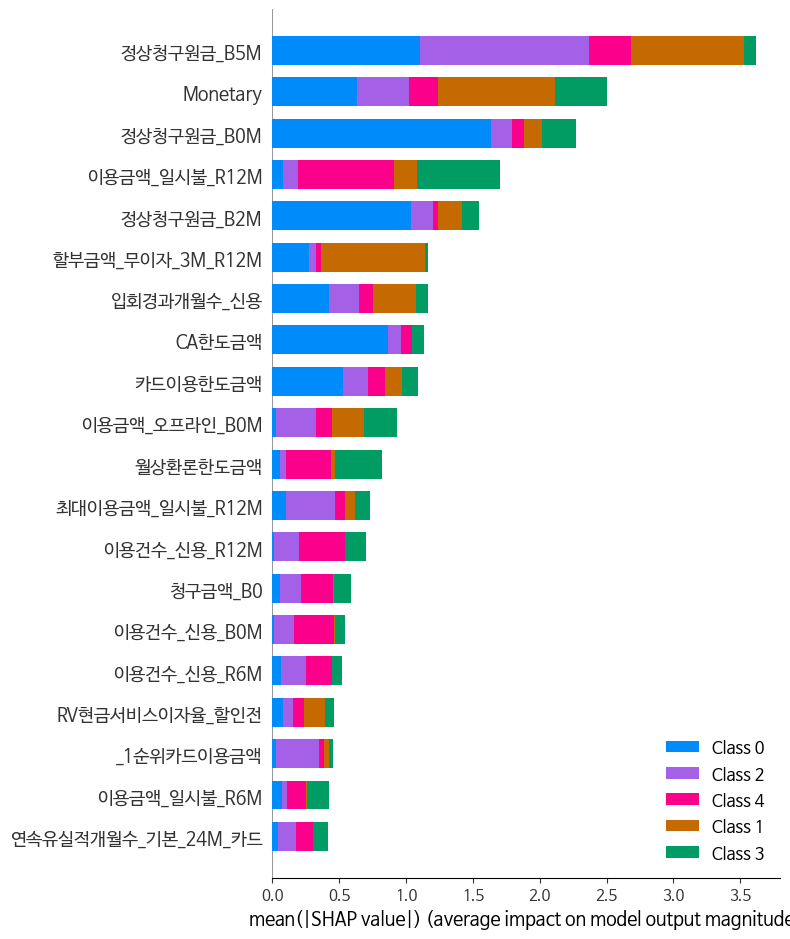

In [ ]:
explainer = shap.TreeExplainer(xgb_model)  # background 없이
X_small = X_sample.sample(n=600, random_state=42)  # ✅ 작게 샘플링
shap_values = explainer(X_small, approximate=False)  # approximate ❌ (GPU라서)
shap.summary_plot(shap_values, X_small)

In [ ]:
print(type(shap_values))


<class 'shap._explanation.Explanation'>



📊 Segment A 중요 피처 (SHAP Top 20)


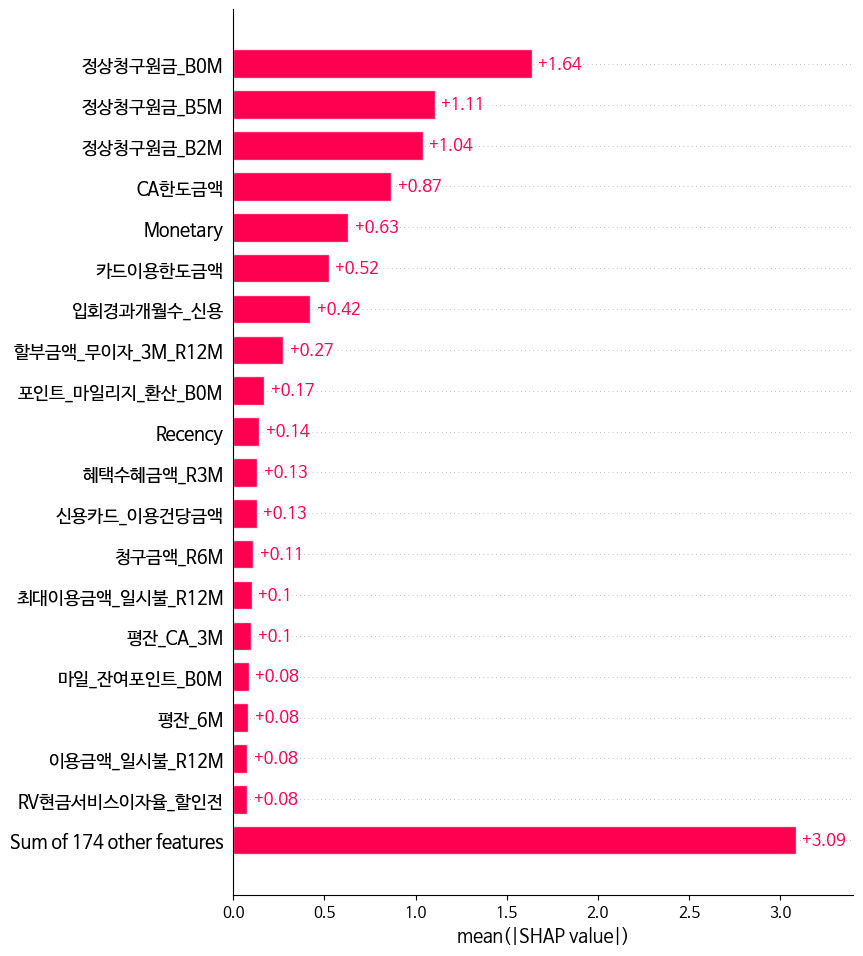


📊 Segment B 중요 피처 (SHAP Top 20)


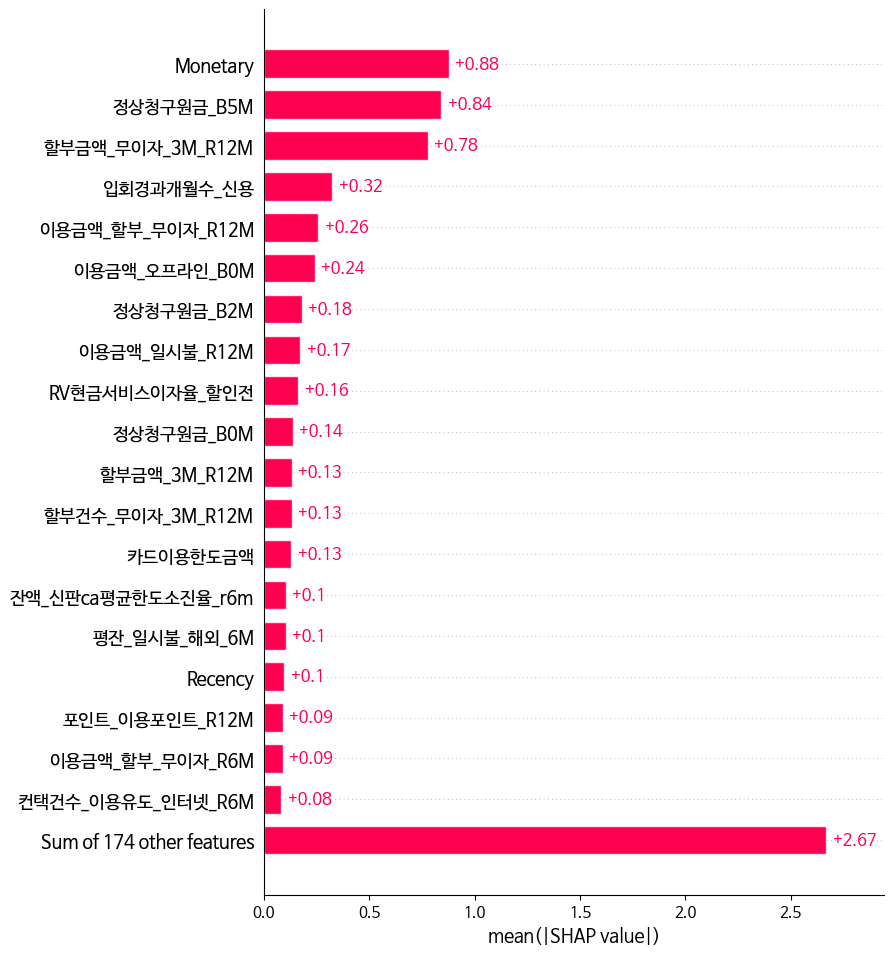


📊 Segment C 중요 피처 (SHAP Top 20)


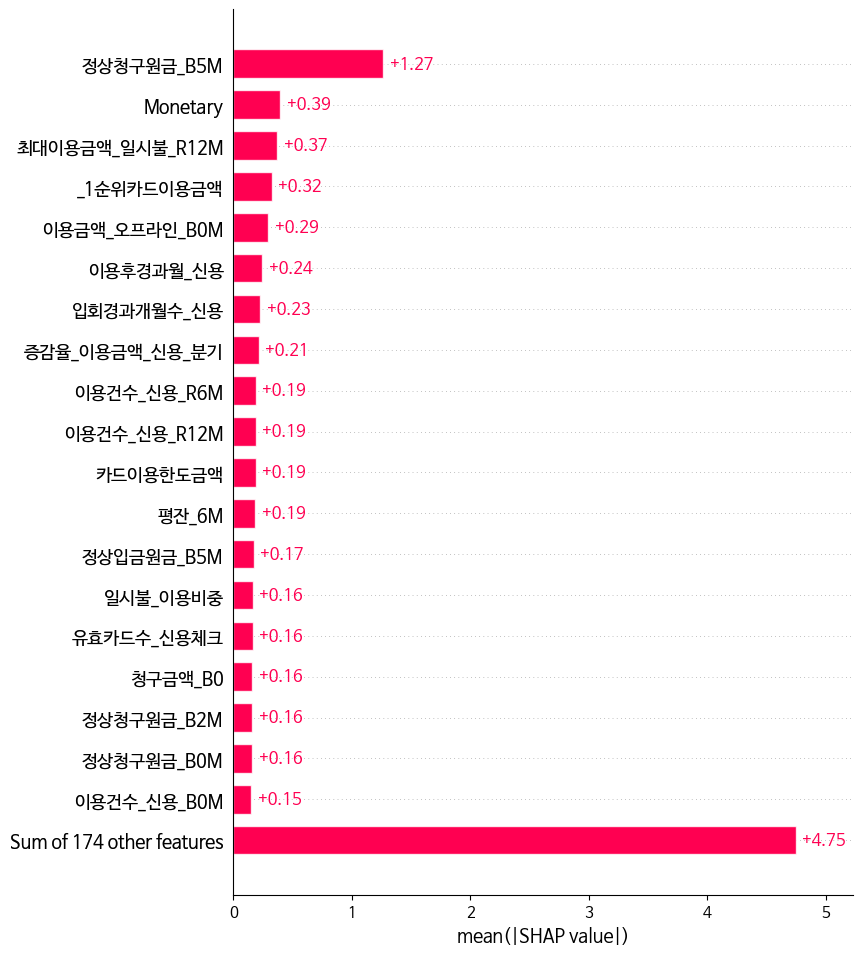


📊 Segment D 중요 피처 (SHAP Top 20)


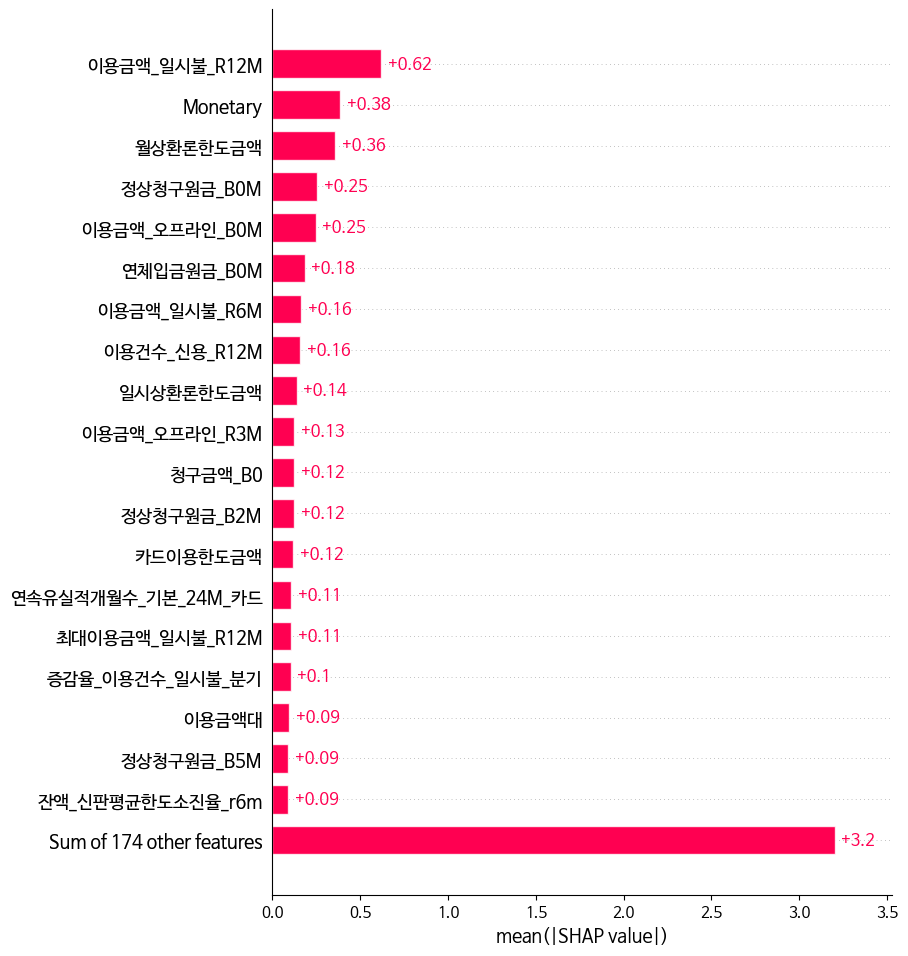


📊 Segment E 중요 피처 (SHAP Top 20)


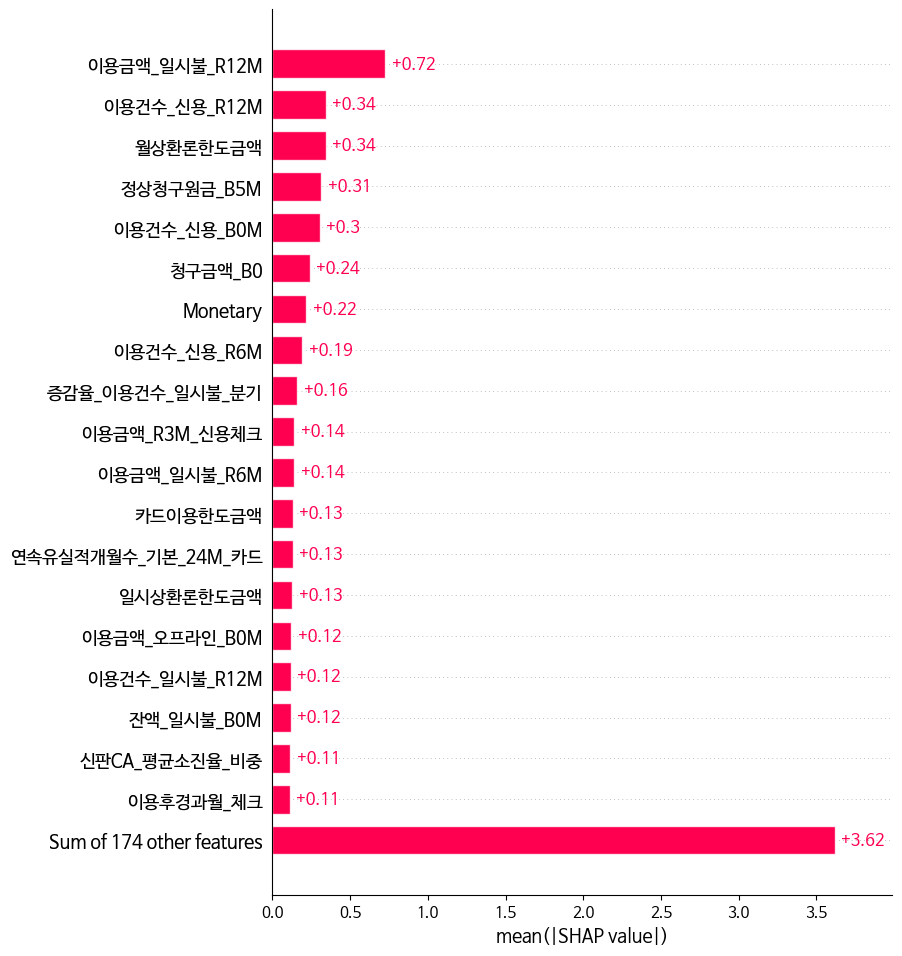

In [ ]:
# 클래스 이름
class_labels = le_y.classes_

# Top 20 중요 피처를 각 클래스별로 출력
for i, seg_name in enumerate(class_labels):
    print(f"\n📊 Segment {seg_name} 중요 피처 (SHAP Top 20)")
    shap.plots.bar(shap_values[:, :, i], max_display=20)

In [ ]:
for i, seg_name in enumerate(class_labels):
    print(f"\n📊 Segment {seg_name} 중요 피처 (SHAP Top 20)")

    shap_vals_i = shap_values[:, :, i]
    top_idx = np.abs(shap_vals_i.values).mean(0).argsort()[::-1][:20]
    top_feats = X.columns[top_idx].tolist()

    print(top_feats)



📊 Segment A 중요 피처 (SHAP Top 20)
['정상청구원금_B0M', '정상청구원금_B5M', '정상청구원금_B2M', 'CA한도금액', 'Monetary', '카드이용한도금액', '입회경과개월수_신용', '할부금액_무이자_3M_R12M', '포인트_마일리지_환산_B0M', 'Recency', '혜택수혜금액_R3M', '신용카드_이용건당금액', '청구금액_R6M', '최대이용금액_일시불_R12M', '평잔_CA_3M', '마일_잔여포인트_B0M', '평잔_6M', '이용금액_일시불_R12M', 'RV현금서비스이자율_할인전', '이용금액_일시불_R3M']

📊 Segment B 중요 피처 (SHAP Top 20)
['Monetary', '정상청구원금_B5M', '할부금액_무이자_3M_R12M', '입회경과개월수_신용', '이용금액_할부_무이자_R12M', '이용금액_오프라인_B0M', '정상청구원금_B2M', '이용금액_일시불_R12M', 'RV현금서비스이자율_할인전', '정상청구원금_B0M', '할부금액_3M_R12M', '할부건수_무이자_3M_R12M', '카드이용한도금액', '잔액_신판ca평균한도소진율_r6m', '평잔_일시불_해외_6M', 'Recency', '포인트_이용포인트_R12M', '이용금액_할부_무이자_R6M', '컨택건수_이용유도_인터넷_R6M', 'RP건수_교통_B0M']

📊 Segment C 중요 피처 (SHAP Top 20)
['정상청구원금_B5M', 'Monetary', '최대이용금액_일시불_R12M', '_1순위카드이용금액', '이용금액_오프라인_B0M', '이용후경과월_신용', '입회경과개월수_신용', '증감율_이용금액_신용_분기', '이용건수_신용_R6M', '이용건수_신용_R12M', '카드이용한도금액', '평잔_6M', '정상입금원금_B5M', '일시불_이용비중', '유효카드수_신용체크', '청구금액_B0', '정상청구원금_B2M', '정상청구원금_B0M', '이용건수_신용_B0M', '연속유실적개월수_기본_


🎯 Segment A SHAP 점플롯


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


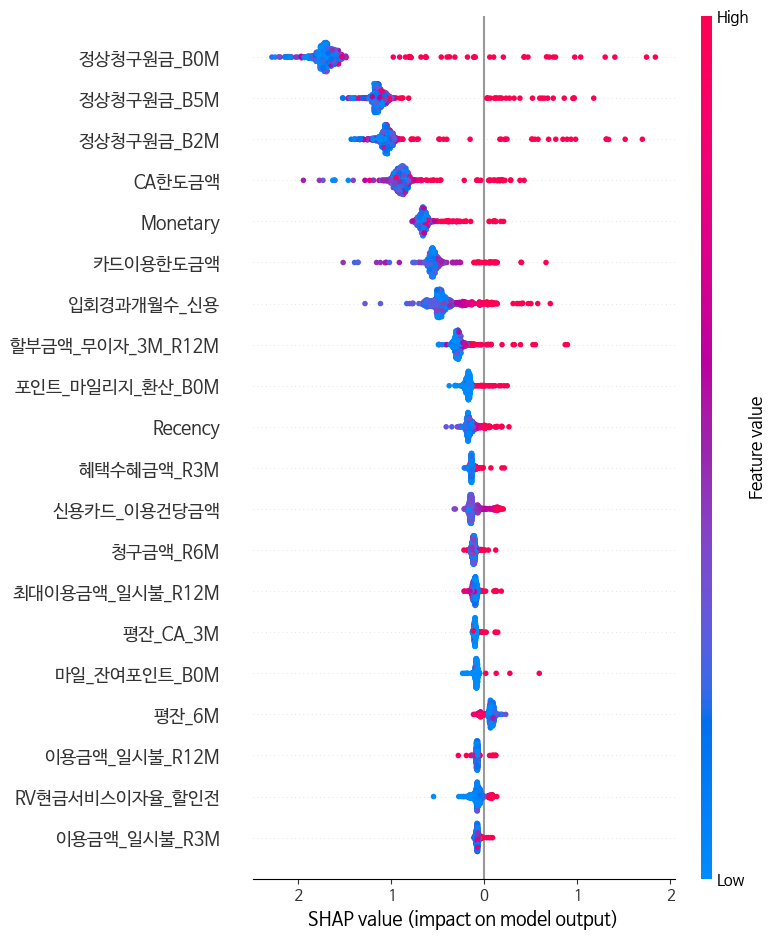


🎯 Segment B SHAP 점플롯


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


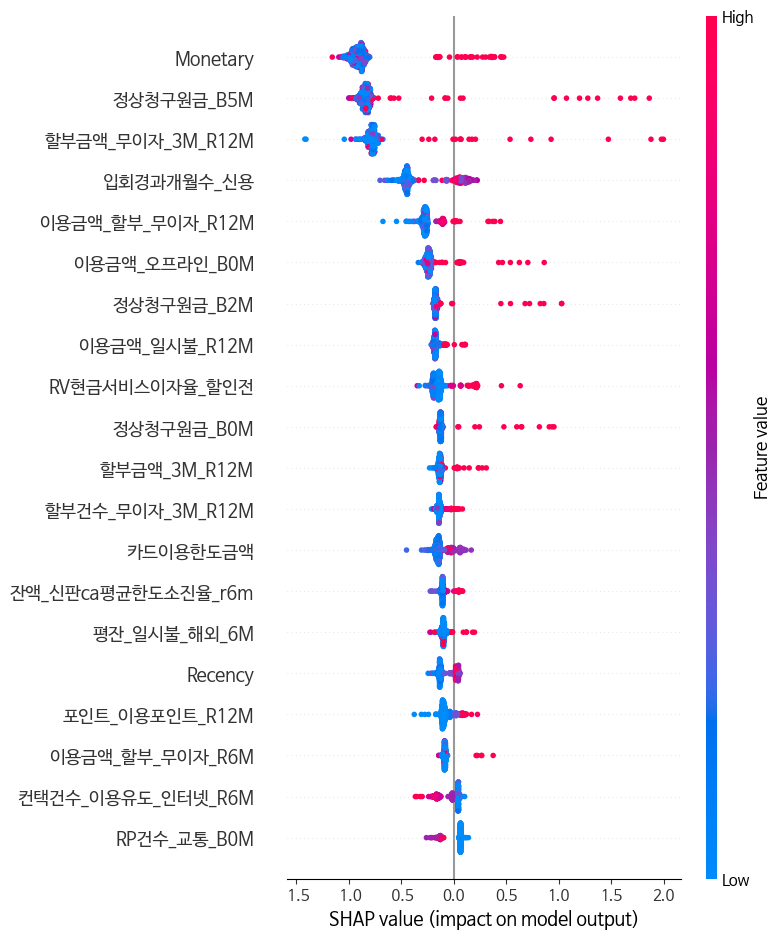


🎯 Segment C SHAP 점플롯


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


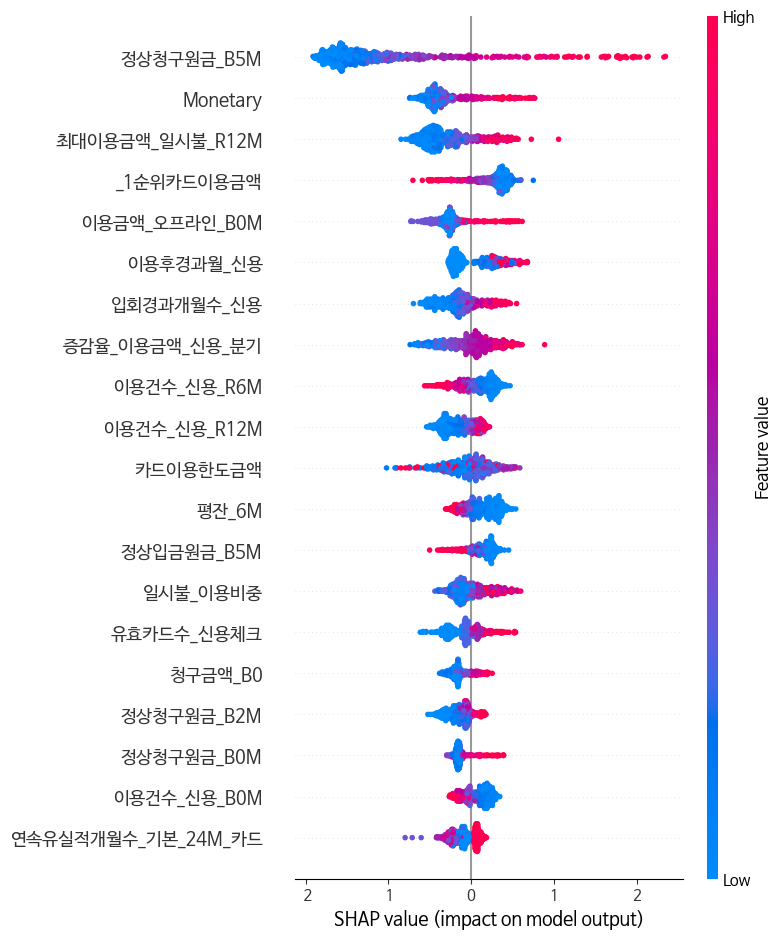


🎯 Segment D SHAP 점플롯


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


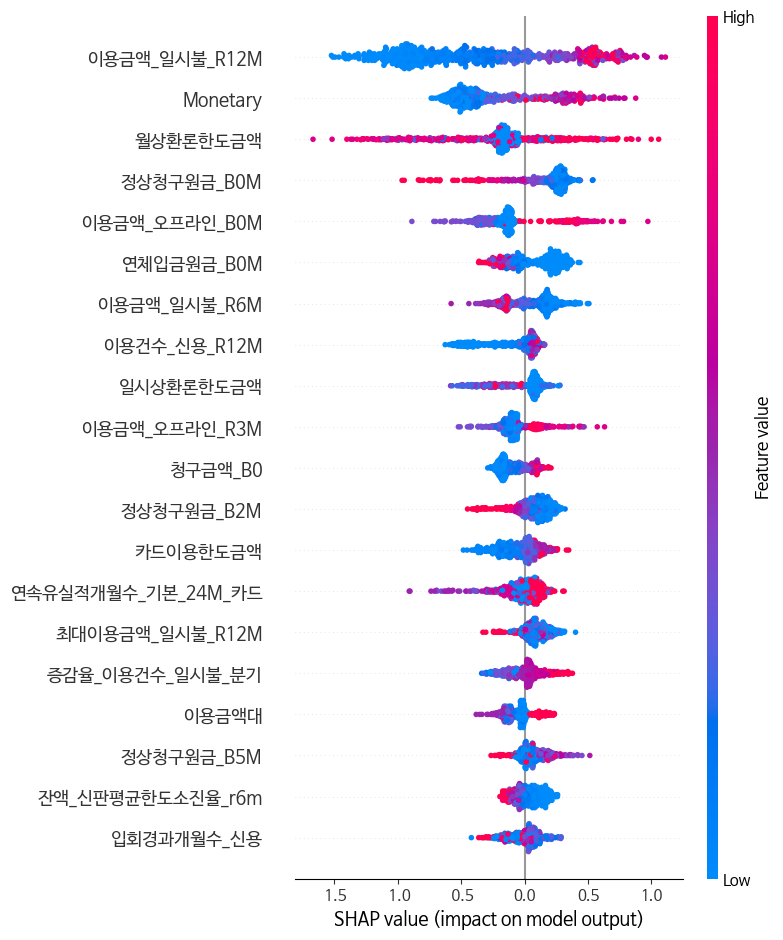


🎯 Segment E SHAP 점플롯


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


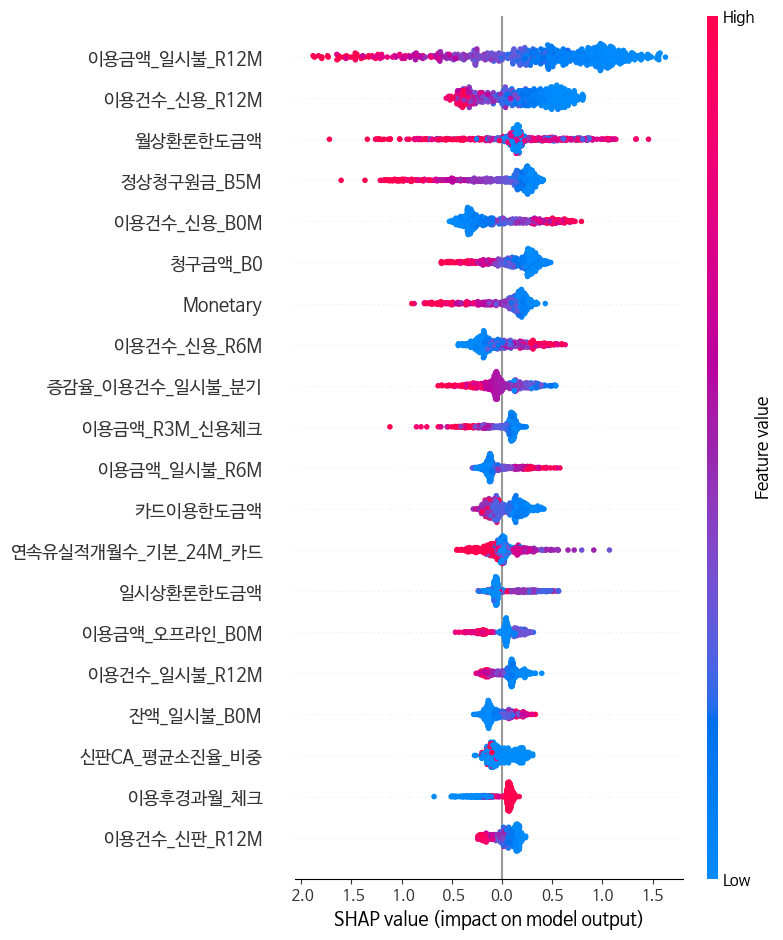

In [ ]:
import shap

# 예: 다중분류 클래스 ["A", "B", "C", "D", "E"]
class_labels = le_y.classes_  # 또는 ["A", "B", "C", "D", "E"]

for i, seg in enumerate(class_labels):
    print(f"\n🎯 Segment {seg} SHAP 점플롯")
    shap.summary_plot(
        shap_values[:, :, i],  # 해당 클래스에 대한 SHAP 값
        X_small,                 # 모델 입력값 (SHAP 계산 시 사용한)
        show=True,
        plot_type="dot"
    )


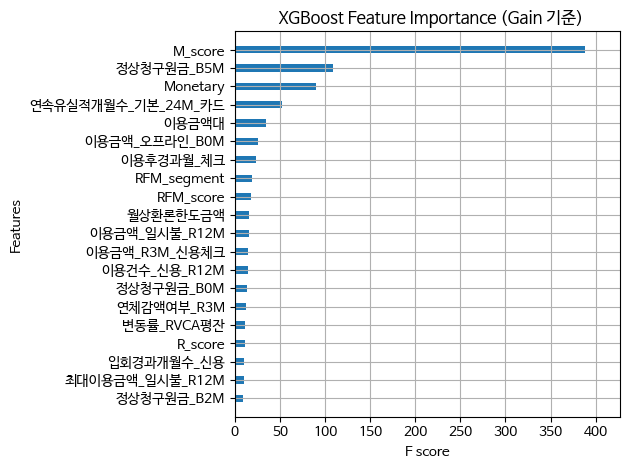

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# 상위 20개 변수만 표시 (gain 기준)
plot_importance(
    xgb_model,
    importance_type='gain',
    max_num_features=20,
    height=0.4,
    grid=True,
    show_values=False
)
plt.title("🧠 XGBoost Feature Importance (Gain 기준)")
plt.tight_layout()
plt.show()

In [ ]:
from modules.feature_selector import (
    a_to_e_base_features,
    get_required_base_columns_for_derived_features,
    generate_common_derived_features
)
from modules.preprocess_utils import map_categorical_columns
from modules.feature_selector import generate_rfm_features_original, rfm_base_columns, rfm_feature_cols, abcd_final_features, a_to_e_base_features
import pandas as pd

# 🚨 Test에는 Segment 없음
base_cols_test = ["ID"]  # Segment 제거

# ✅ Test용 컬럼 조합
required_cols = get_required_base_columns_for_derived_features()
test_cols = sorted(set(base_cols_test + a_to_e_base_features + required_cols + rfm_base_columns))

# ✅ Test 데이터 로드
test_df = pd.read_parquet(test_path, columns=test_cols)

# ✅ 전처리 및 파생 변수 동일하게 적용
test_df = map_categorical_columns(test_df)                    # 범주형 인코딩
test_df = generate_rfm_features_original(test_df)             # RFM 파생 변수 생성
test_df = generate_common_derived_features(test_df)           # 기타 파생 변수 생성

# ✅ 최종 사용 컬럼 정리 (Segment 제외)
X_test_final = test_df[list(set(final_features) - {"Segment"})].copy()

[연회비발생카드수_B0M] 인코딩 완료
[한도증액횟수_R12M] 인코딩 완료
[이용금액대] 중간값 인코딩 완료
[할인건수_R3M] 인코딩 완료
[할인건수_B0M] 인코딩 완료
✔️ RFM 파생변수 생성 완료
=== RFM 변수 요약 ===

-- Recency 통계 --
count    600000.000000
mean         73.440873
std          72.283611
min           2.000000
25%          17.000000
50%          51.000000
75%         103.000000
max         329.000000
Name: Recency, dtype: float64
값 분포:
Recency
2      13002
3      13966
4      14975
5      16033
6      29992
       ...  
325        8
326        6
327        3
328        1
329        2
Name: count, Length: 328, dtype: int64

-- Frequency 통계 --
count    600000.000000
mean        108.593190
std         134.755554
min           0.000000
25%           5.000000
50%          51.000000
75%         167.000000
max         869.000000
Name: Frequency, dtype: float64
값 분포:
Frequency
0      114026
1        9767
2        8561
3        7754
4        6889
        ...  
836         1
839         2
841         1
859         1
869         1
Name: count, Length: 822, dtype:

In [ ]:
# 현재 X_test_input에서 문자열(object) 컬럼 확인
non_numeric_cols = X_test_input.select_dtypes(include='object').columns.tolist()
print("❗ 변환되지 않은 컬럼:", non_numeric_cols)


❗ 변환되지 않은 컬럼: ['RFM_segment', 'RFM_score']


In [ ]:
# train_df의 동일한 컬럼을 기준으로 LabelEncoder 학습 후 test에 적용
for col in non_numeric_cols:
    le = LabelEncoder()
    le.fit(train_df[col].astype(str))  # train 기준 학습
    X_test_input[col] = le.transform(X_test_input[col].astype(str))  # test에 transform


In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_input), columns=model_features)

# 🔸 스케일링 적용
X_test_scaled = pd.DataFrame(scaler.transform(X_test_input), columns=model_features)

# 🔸 예측 확률
y_test_proba = xgb_model.predict_proba(X_test_scaled)

# 🔸 Optuna 기반 Threshold 적용
y_test_pred = predict_with_optuna_threshold(y_test_proba, best_thresholds)

# 🔸 숫자 → 클래스 라벨로 복원
y_test_label = le_y.inverse_transform(y_test_pred)

# 🔸 제출 파일 생성
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "Segment": y_test_label
})
submission.to_csv("submission.csv", index=False)
print("✅ Test 예측 완료 및 제출 파일 저장: submission.csv")

✅ Test 예측 완료 및 제출 파일 저장: submission.csv


In [ ]:
# ID별로 가장 많은 예측값(Majority Voting) 사용
submission_df = pd.DataFrame({
    "ID": test_df["ID"],
    "Segment": le_y.inverse_transform(y_test_pred)
})

# ✅ 다수결 방식으로 ID별 대표 Segment 선택
final_submission = submission_df.groupby("ID")["Segment"] \
    .agg(lambda x: x.value_counts().idxmax()) \
    .reset_index()

In [ ]:
final_submission.to_csv("submission_final.csv", index=False)
print("✅ 최종 통합 예측 파일 저장 완료: submission.csv")

✅ 최종 통합 예측 파일 저장 완료: submission.csv


In [ ]:
# 🔸 학습셋에 대한 확률 예측
y_train_proba = xgb_model.predict_proba(X_train)

# 🔸 Optuna에서 구한 threshold 적용
y_train_pred = predict_with_optuna_threshold(y_train_proba, best_thresholds)


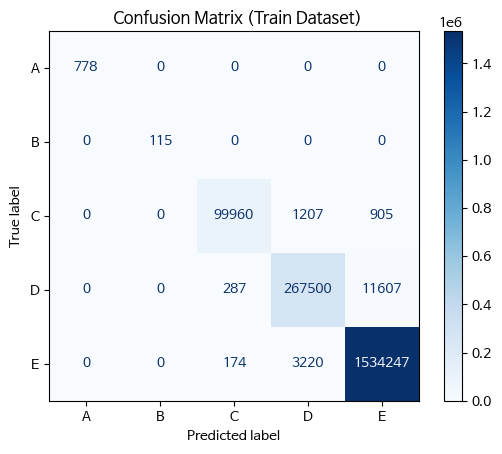

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 숫자 → 문자 라벨 복원
y_train_label = le_y.inverse_transform(y_train)
y_pred_label = le_y.inverse_transform(y_train_pred)

# 혼돈 행렬 계산
cm = confusion_matrix(y_train_label, y_pred_label, labels=le_y.classes_)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_y.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("📊 Confusion Matrix (Train Dataset)")
plt.show()

In [ ]:
# X_train과 ID 매핑이 동일한 train_df에서 ID 가져오기
train_ids = train_df.loc[X_train.index, "ID"].reset_index(drop=True)

# 라벨 복원
y_train_label = le_y.inverse_transform(y_train)
y_pred_label = le_y.inverse_transform(y_train_pred)

train_preds_df = pd.DataFrame({
    "ID": train_ids,
    "true": y_train_label,
    "pred": y_pred_label
})


In [ ]:
# 각 ID별 실제값: 가장 많이 나타난 true 값 (다중 row라도 동일하게 되어 있어야 정상)
true_segment_by_id = train_preds_df.groupby("ID")["true"].agg(lambda x: x.value_counts().idxmax())
pred_segment_by_id = train_preds_df.groupby("ID")["pred"].agg(lambda x: x.value_counts().idxmax())


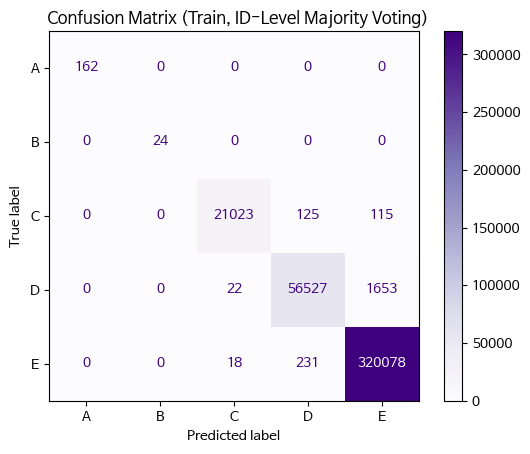

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(true_segment_by_id, pred_segment_by_id, labels=le_y.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_y.classes_)
disp.plot(cmap='Purples', values_format='d')
plt.title("📊 Confusion Matrix (Train, ID-Level Majority Voting)")
plt.show()


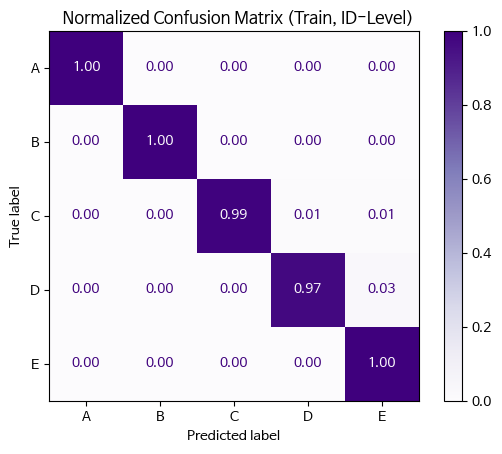

In [ ]:
cm_normalized = confusion_matrix(
    true_segment_by_id,
    pred_segment_by_id,
    labels=le_y.classes_,
    normalize='true'  # 각 행 기준 (= 실제 클래스 기준)으로 정규화
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le_y.classes_)
disp.plot(cmap='Purples', values_format='.2f')
plt.title("📊 Normalized Confusion Matrix (Train, ID-Level)")
plt.show()


In [ ]:
# ✅ 다수결 기준 최종 제출 데이터 (이미 존재 시)
# final_submission = DataFrame with ["ID", "Segment"]

# 세그먼트 분포 확인
segment_counts = final_submission["Segment"].value_counts().sort_index()
segment_ratio = final_submission["Segment"].value_counts(normalize=True).sort_index()

print("🔢 세그먼트 예측 개수:\n", segment_counts)
print("\n📊 세그먼트 예측 비율:\n", (segment_ratio * 100).round(2).astype(str) + "%")


🔢 세그먼트 예측 개수:
 Segment
A       23
B        1
C     4411
D    13624
E    81941
Name: count, dtype: int64

📊 세그먼트 예측 비율:
 Segment
A     0.02%
B      0.0%
C     4.41%
D    13.62%
E    81.94%
Name: proportion, dtype: object


In [ ]:
# 🔍 B로 예측된 ID 목록 추출
segment_b_ids = final_submission.query("Segment == 'B'")["ID"]
print(f"🔎 Segment B로 예측된 ID 수: {len(segment_b_ids)}")


🔎 Segment B로 예측된 ID 수: 1


In [ ]:
# 원본 test_df에서 B 예측된 ID만 필터링
b_segment_df = test_df[test_df["ID"].isin(segment_b_ids)].copy()


In [ ]:
# 🔹 예측 확률 (검증셋 기준)
val_proba = xgb_model.predict_proba(X_val)

# 🔹 예측확률 + ID + 라벨 복원
val_ids = train_df.loc[X_val.index, "ID"].values
val_df = pd.DataFrame(val_proba, columns=le_y.classes_)
val_df["ID"] = val_ids

# 🔹 SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# 🔁 Segment A~E 반복
for cls in le_y.classes_:  # ['A', 'B', 'C', 'D', 'E']
    print(f"\n🔍 [VAL] Segment {cls} 확률 0.6 ~ 0.74 전환 가능 후보군 분석")

    # 후보군 필터링
    candidates = val_df[(val_df[cls] >= 0.5) & (val_df[cls] <= 0.74)].copy()
    candidate_ids = candidates["ID"]

    # 🔹 인코딩된 train_df에서 검증셋 행만 추출
    candidate_inputs = train_df.loc[train_df["ID"].isin(candidate_ids), X_train.columns].reset_index(drop=True)

    if candidate_inputs.empty:
        print(f"🚫 후보 없음 (Segment {cls})")
        continue

    # 🔹 스케일링 (train 기준 scaler 적용)
    candidate_scaled = pd.DataFrame(
        scaler.transform(candidate_inputs),
        columns=X_train.columns
    )

    # 🔹 SHAP 계산
    shap_values = explainer.shap_values(candidate_scaled)
    class_idx = list(le_y.classes_).index(cls)

    shap.summary_plot(
        shap_values[class_idx],
        candidate_scaled,
        feature_names=candidate_scaled.columns,
        plot_type="bar",
        show=False
    )
    plt.title(f"📊 [VAL] Segment {cls} 전환 가능 SHAP (0.6 ~ 0.74)")
    plt.tight_layout()
    plt.show()



🔍 [VAL] Segment A 확률 0.6 ~ 0.74 전환 가능 후보군 분석


ValueError: could not convert string to float: 'High'

In [ ]:
print("🚨 남아 있는 문자형 컬럼:", candidate_inputs.select_dtypes(include='object').columns.tolist())


🚨 남아 있는 문자형 컬럼: ['RFM_segment', 'RFM_score']


In [ ]:
candidate_inputs = candidate_inputs.drop(columns=["RFM_segment", "RFM_score"])


In [ ]:
import pandas as pd
import numpy as np

# 예측 확률
val_proba = xgb_model.predict_proba(X_val)
class_labels = list(le_y.classes_)  # ['A', 'B', 'C', 'D', 'E']

# ID와 매핑
val_ids = train_df.loc[X_val.index, "ID"].values
val_df = pd.DataFrame(val_proba, columns=class_labels)
val_df["ID"] = val_ids

# 후보군 개수 저장용
segment_candidate_counts = {}

# 반복하면서 분포 확인
for cls in class_labels:
    condition = (val_df[cls] >= 0.6) & (val_df[cls] <= 0.74)
    count = condition.sum()
    segment_candidate_counts[cls] = count
    print(f"🔍 Segment {cls} 후보군 개수 (0.56 ~ 0.74): {count}")


🔍 Segment A 후보군 개수 (0.56 ~ 0.74): 17
🔍 Segment B 후보군 개수 (0.56 ~ 0.74): 0
🔍 Segment C 후보군 개수 (0.56 ~ 0.74): 3502
🔍 Segment D 후보군 개수 (0.56 ~ 0.74): 11997
🔍 Segment E 후보군 개수 (0.56 ~ 0.74): 10092



🔍 [VAL] Segment A 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


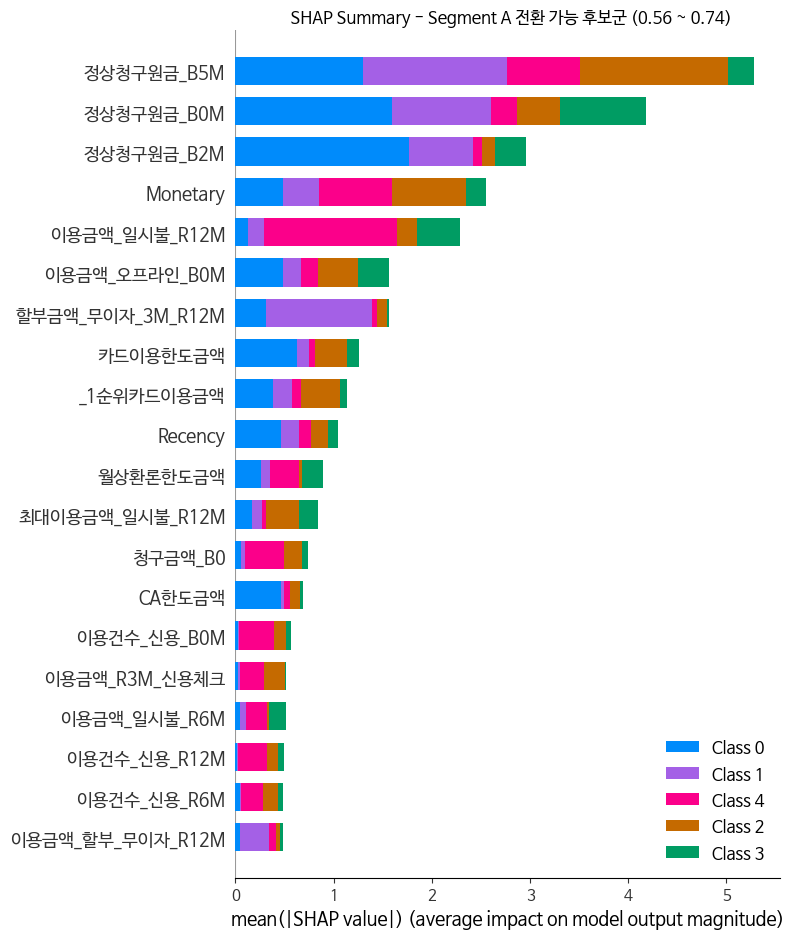


🔍 [VAL] Segment B 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


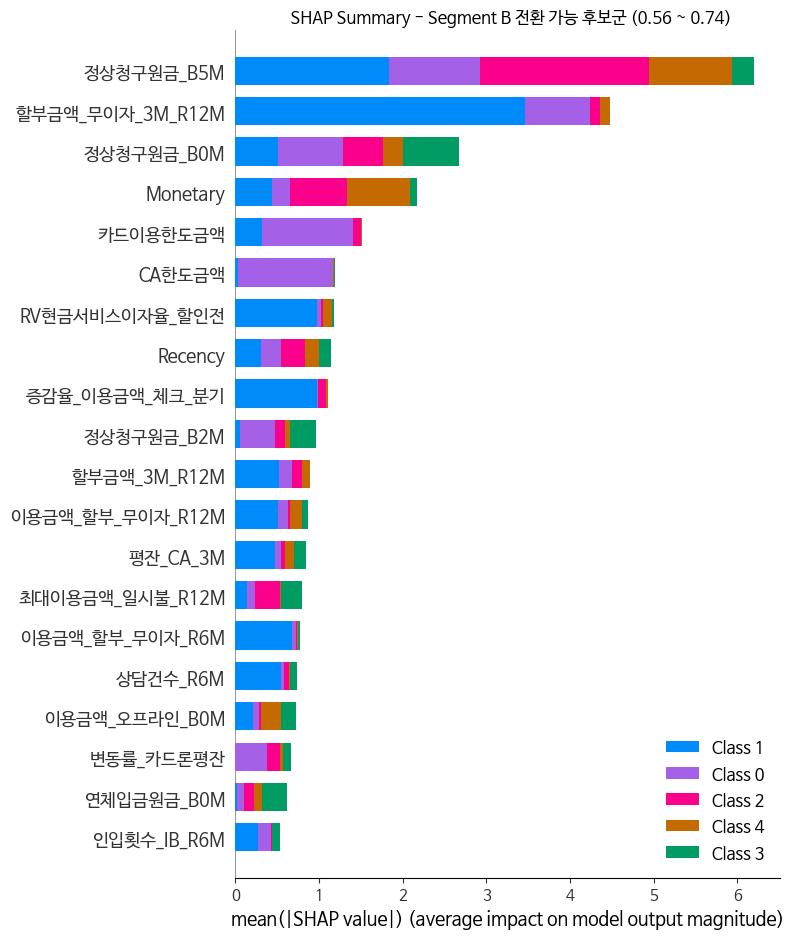


🔍 [VAL] Segment C 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


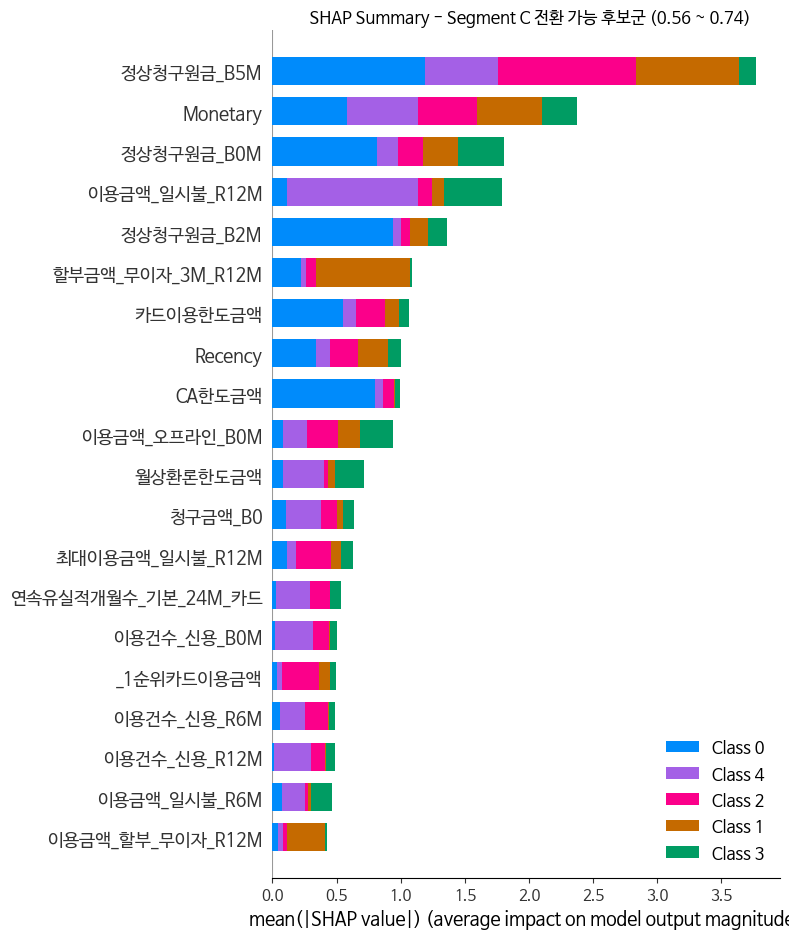


🔍 [VAL] Segment D 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


KeyboardInterrupt: 

In [ ]:
for cls in class_labels:
    print(f"\n🔍 [VAL] Segment {cls} 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석")

    # 후보군 ID 추출
    candidate_ids = val_df[(val_df[cls] >= 0.56) & (val_df[cls] <= 0.74)]["ID"]

    # X_val + ID 붙여서 필터링
    X_val_with_id = X_val.copy()
    X_val_with_id["ID"] = val_ids

    candidate_inputs = X_val_with_id[X_val_with_id["ID"].isin(candidate_ids)].drop(columns="ID").reset_index(drop=True)

    if candidate_inputs.empty:
        print(f"🚫 후보 없음 (Segment {cls})")
        continue

    # SHAP 값 계산
    shap_values = explainer(candidate_inputs)

    # ✅ 클래스 인덱스 가져오기
    class_idx = class_labels.index(cls)

    # ✅ 해당 Segment의 SHAP만 추출
    shap_for_cls = shap_values[..., class_idx]  # ← 핵심 수정!

    # ✅ summary plot (특정 Segment 기준)
    shap.summary_plot(shap_for_cls, candidate_inputs, show=False)
    plt.title(f"📊 SHAP Summary - Segment {cls} 후보군 (0.56 ~ 0.74) → 클래스 {cls}")
    plt.tight_layout()
    plt.show()



🔍 [VAL] Segment A 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


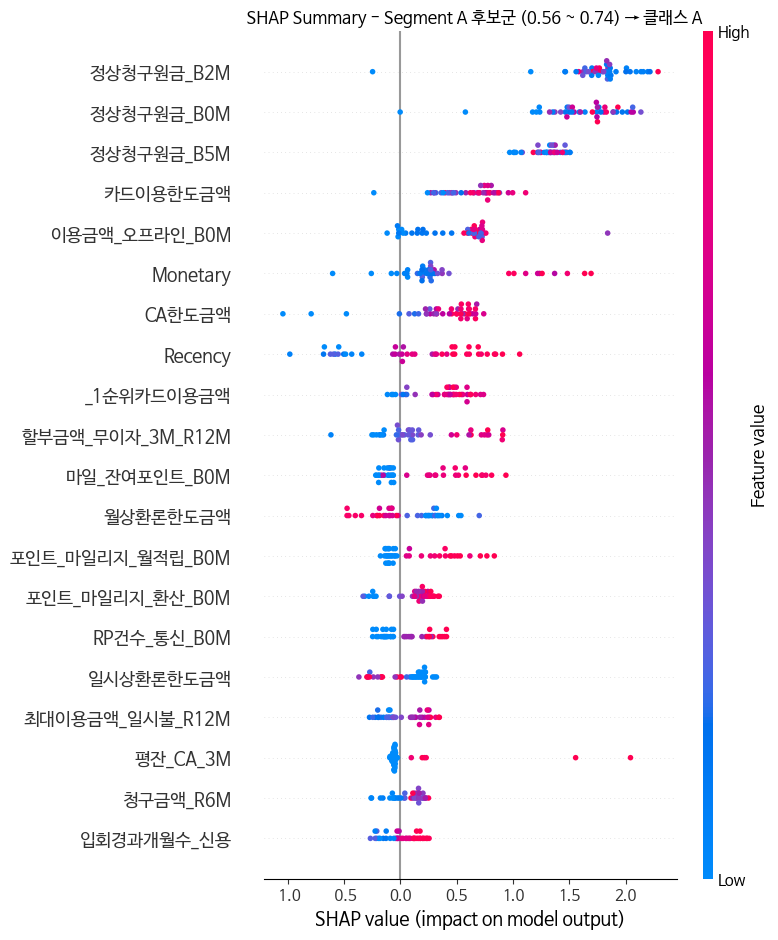


🔍 [VAL] Segment B 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


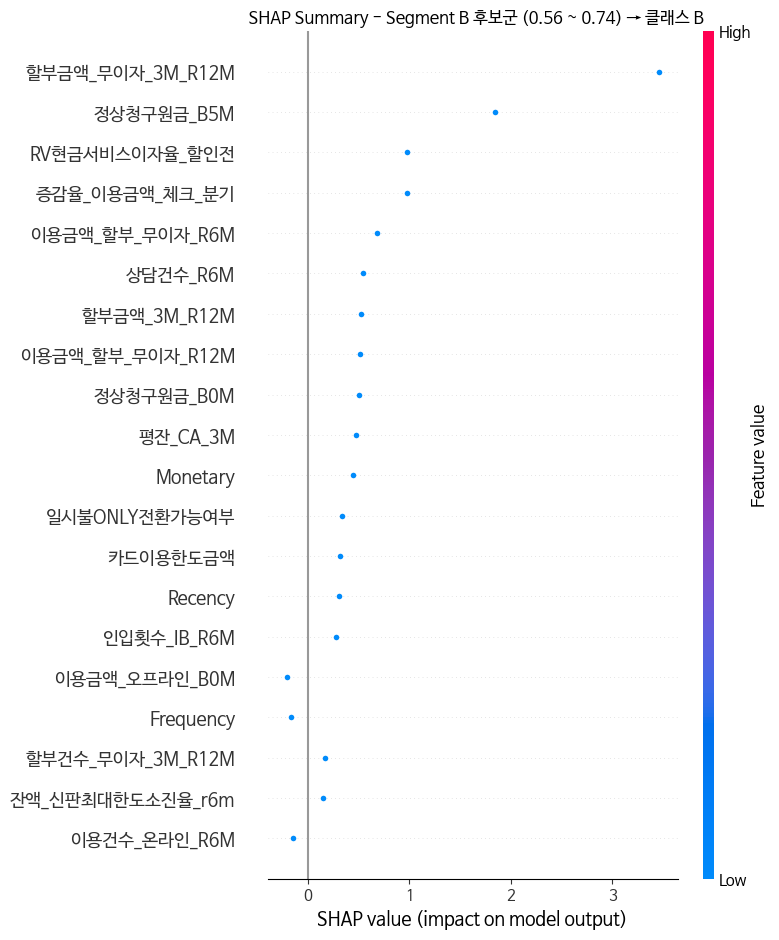


🔍 [VAL] Segment C 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


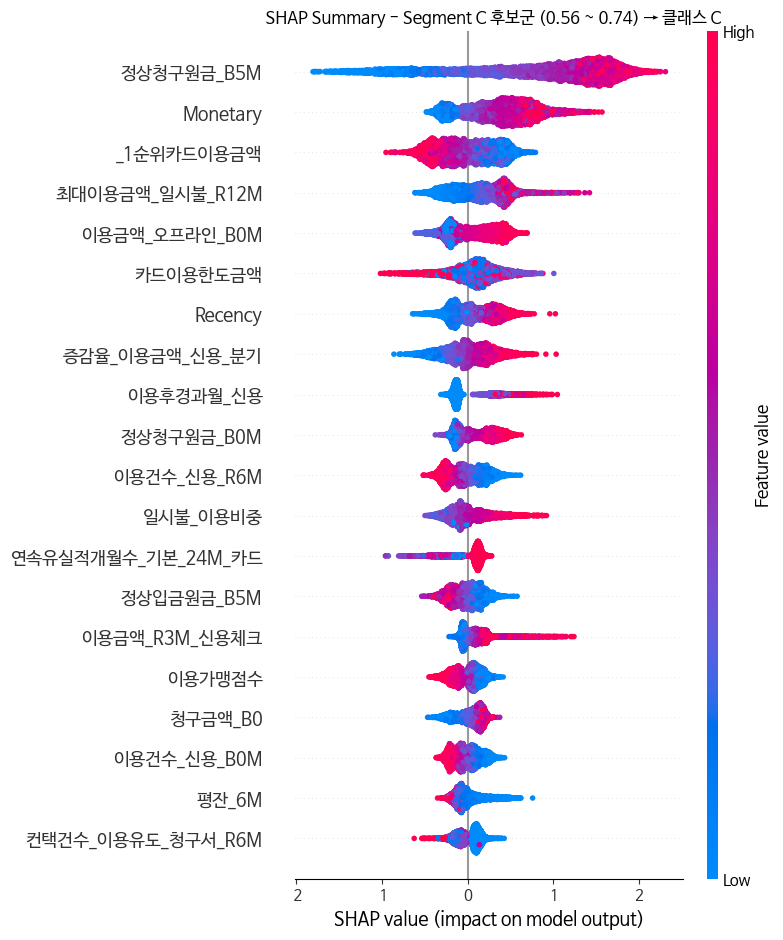


🔍 [VAL] Segment D 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


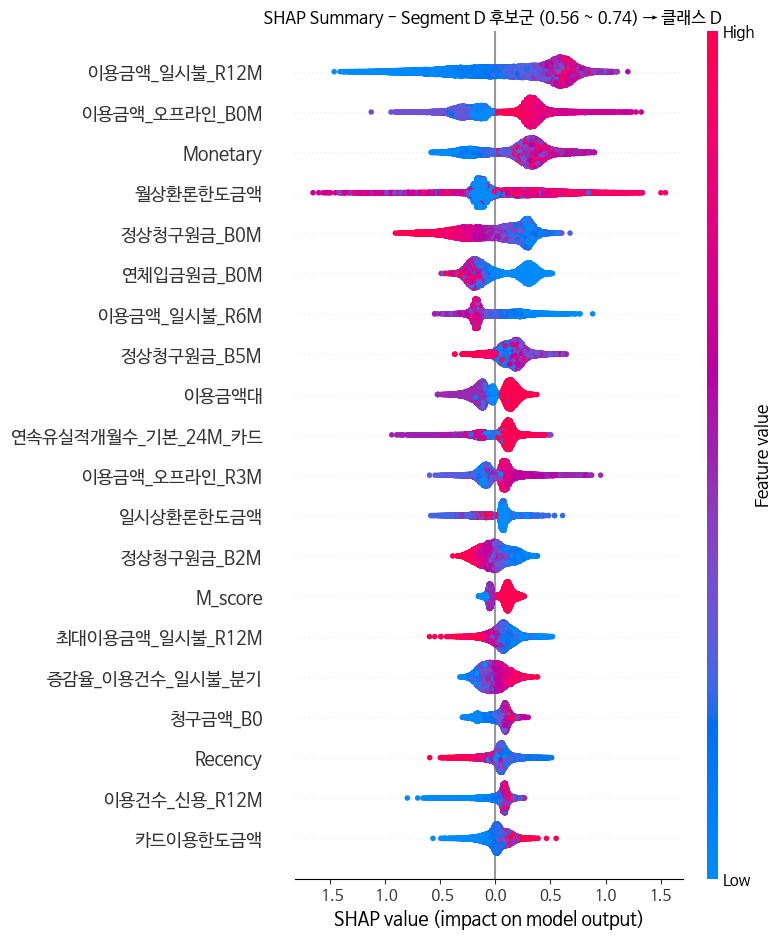


🔍 [VAL] Segment E 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석


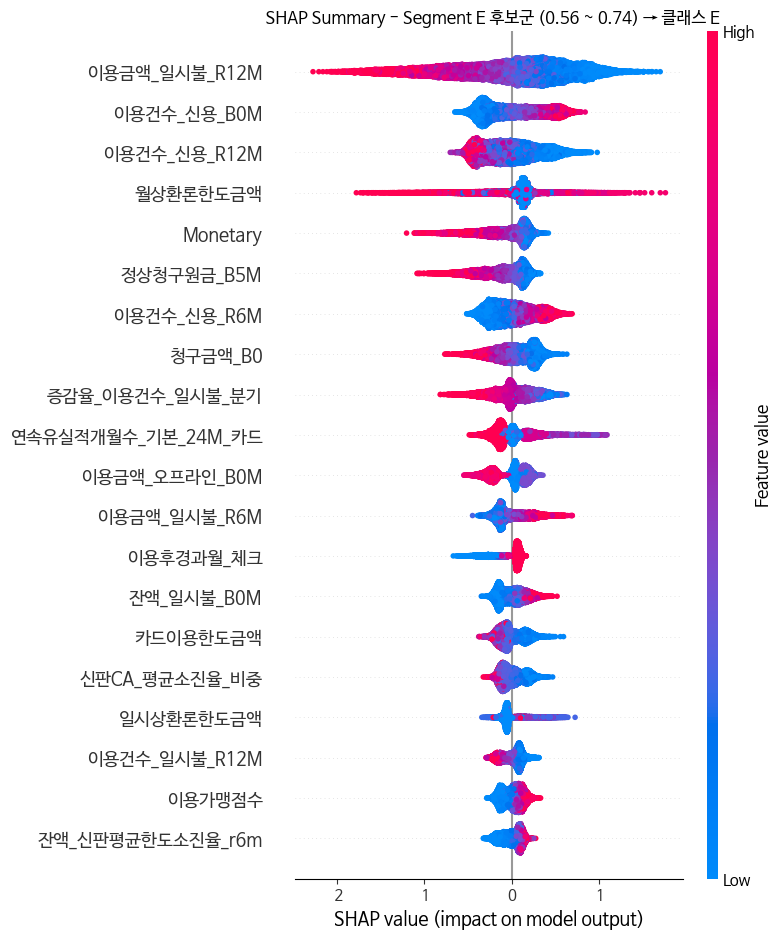

In [ ]:
for cls in class_labels:
    print(f"\n🔍 [VAL] Segment {cls} 확률 0.56 ~ 0.74 전환 가능 후보군 SHAP 분석")

    # 후보군 ID 추출
    candidate_ids = val_df[(val_df[cls] >= 0.56) & (val_df[cls] <= 0.74)]["ID"]

    # X_val + ID 붙여서 필터링
    X_val_with_id = X_val.copy()
    X_val_with_id["ID"] = val_ids

    candidate_inputs = X_val_with_id[X_val_with_id["ID"].isin(candidate_ids)].drop(columns="ID").reset_index(drop=True)

    if candidate_inputs.empty:
        print(f"🚫 후보 없음 (Segment {cls})")
        continue

    # SHAP 값 계산
    shap_values = explainer(candidate_inputs)

    # ✅ 클래스 인덱스 가져오기
    class_idx = class_labels.index(cls)

    # ✅ 해당 Segment의 SHAP만 추출
    shap_for_cls = shap_values[..., class_idx]  # ← 핵심 수정!

    # ✅ summary plot (특정 Segment 기준)
    shap.summary_plot(shap_for_cls, candidate_inputs, show=False)
    plt.title(f"📊 SHAP Summary - Segment {cls} 후보군 (0.56 ~ 0.74) → 클래스 {cls}")
    plt.tight_layout()
    plt.show()


In [ ]:
import shap
import pandas as pd

explainer = shap.Explainer(xgb_model)
class_labels = list(le_y.classes_)  # ['A', 'B', 'C', 'D', 'E']
val_proba = xgb_model.predict_proba(X_val)
val_ids = train_df.loc[X_val.index, "ID"].values
val_df = pd.DataFrame(val_proba, columns=class_labels)
val_df["ID"] = val_ids

# 결과 저장용
shap_feature_summary = {}

for cls in class_labels:
    print(f"\n🔍 Segment {cls} 전환 후보군 SHAP Top Feature 추출")

    # 후보군 ID 추출
    candidate_ids = val_df[(val_df[cls] >= 0.56) & (val_df[cls] <= 0.74)]["ID"]
    X_val_with_id = X_val.copy()
    X_val_with_id["ID"] = val_ids

    candidate_inputs = X_val_with_id[X_val_with_id["ID"].isin(candidate_ids)].drop(columns="ID").reset_index(drop=True)

    if candidate_inputs.empty:
        print(f"🚫 후보 없음 (Segment {cls})")
        shap_feature_summary[cls] = pd.DataFrame(columns=["Feature", "Mean |SHAP|"])
        continue

    # SHAP 계산
    shap_values = explainer(candidate_inputs)
    class_idx = class_labels.index(cls)
    shap_for_cls = shap_values[..., class_idx]

    # ✅ SHAP 영향력 상위 피처 추출
    mean_shap = pd.DataFrame({
        "Feature": candidate_inputs.columns,
        "Mean |SHAP|": np.abs(shap_for_cls.values).mean(axis=0)
    }).sort_values(by="Mean |SHAP|", ascending=False).reset_index(drop=True)

    shap_feature_summary[cls] = mean_shap

    # 상위 10개 출력 확인
    print(mean_shap.head(10))



🔍 Segment A 전환 후보군 SHAP Top Feature 추출
            Feature  Mean |SHAP|
0        정상청구원금_B2M     1.772297
1        정상청구원금_B0M     1.596250
2        정상청구원금_B5M     1.304375
3          카드이용한도금액     0.628867
4     이용금액_오프라인_B0M     0.488190
5          Monetary     0.486864
6            CA한도금액     0.469137
7           Recency     0.462242
8        _1순위카드이용금액     0.385507
9  할부금액_무이자_3M_R12M     0.312906

🔍 Segment B 전환 후보군 SHAP Top Feature 추출
            Feature  Mean |SHAP|
0  할부금액_무이자_3M_R12M     3.460704
1        정상청구원금_B5M     1.838983
2    RV현금서비스이자율_할인전     0.975762
3    증감율_이용금액_체크_분기     0.972734
4   이용금액_할부_무이자_R6M     0.681191
5          상담건수_R6M     0.543493
6      할부금액_3M_R12M     0.526443
7  이용금액_할부_무이자_R12M     0.511540
8        정상청구원금_B0M     0.507655
9          평잔_CA_3M     0.471745

🔍 Segment C 전환 후보군 SHAP Top Feature 추출
           Feature  Mean |SHAP|
0       정상청구원금_B5M     1.074840
1         Monetary     0.456906
2       _1순위카드이용금액     0.281964
3  최대이용금액_일시불_R12M     0.2

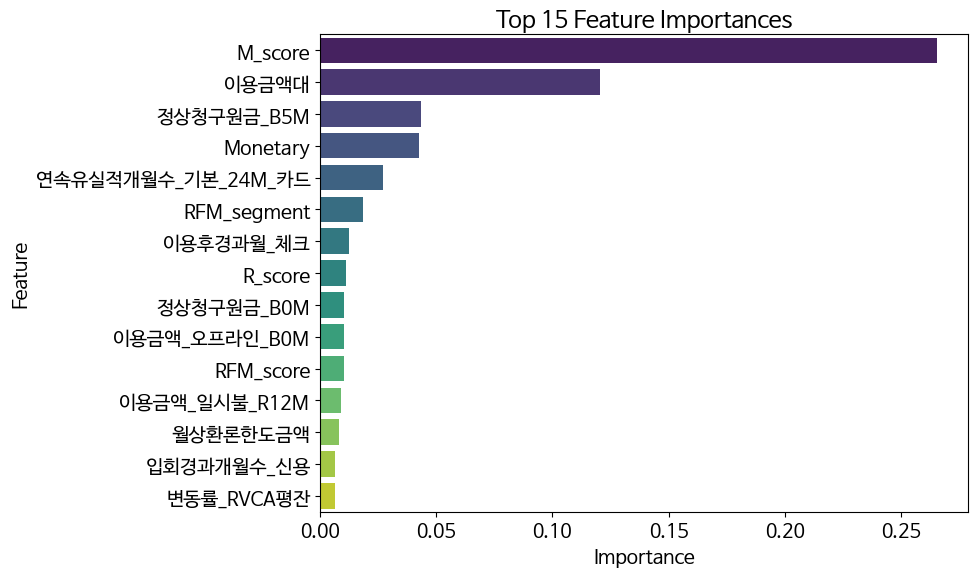

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# :white_check_mark: 기본 설정
plt.rcParams.update({
    'font.family': 'NanumBarunGothic',  # 또는 'AppleGothic'
    'font.size': 14,
    'axes.unicode_minus': False
})

# :white_check_mark: 중요도 정리
# Corrected: Use X.columns for feature names and xgb_model.feature_importances_
feature_names = X.columns
importances = xgb_model.feature_importances_

importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by="Importance", ascending=False)
)

# :white_check_mark: 시각화
plt.figure(figsize=(10, 6))  # 위 코드 스타일로 사이즈 맞춤
sns.barplot(data=importance_df.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()